<a href="https://colab.research.google.com/github/SeongwonTak/Data_Practices/blob/master/EDA_Practice_SecondarySchoolStudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA 연습_Secondary School data

다음의 Kaggle Data를 바탕으로 문제를 추출 및 데이터 특성을 파악하고
통계 검정을 활용하여 상관관계가 유의미한지 등을 확인하는 연습을 하였다.

출처>
https://www.kaggle.com/uciml/student-alcohol-consumption



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/secondarystudent/student-mat.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


이번에는 모든 column을 다 쓰진 않을 것이고, 
일부 column만 활용할 것이다.
활용하려는 column 내용은 다음과 같다.


- sex, age : 나이, 성별
- address : U일 경우 urban, R일 경우 rural
- famsize : GT3은 3초과, LE3은 3 이하
- traveltime : 통학시간 (15분이하, 15-30분, 30-1시간,  >1시간)
- studytime : 주당공부시간 (2시간이하, 2-5시간, 5-10시간, >10시간)
- failures : 낙제 과목 개수
- schoolsup : 학교의 교육 지원을 받는가.
- famsup : 가족들에게 교육 지원을 받는가.
- paid : 사교육 어부.
- higher : 상급 학교 진학 희망 여부
- internet : 집에 인터넷이 들어오는지 여부
- romantic : 연애여부(..ㅠㅠ)
- famrel : 가족들과의 관계. (1에서 5, 1이 매우 나쁨, 5가 매우 좋음)
- health : 건강상태 (1에서 5, 1이 매우 나쁨, 5가 매우 좋음)
- absences : 결석일수
- G3 : Final grade (20점 만점)

먼저 이것들만을 담은 데이터 테이블을 만들려고 한다.

In [4]:
df = df.loc[:,['sex', 'age', 'address', 'famsize', 'traveltime', 'studytime', 'failures',
               'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'romantic', 'famrel',
               'health', 'absences', 'G3']]

In [ ]:
df

,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,health,absences,G3
0,F,18,U,GT3,2,2,0,yes,no,no,yes,no,no,4,3,6,6
1,F,17,U,GT3,1,2,0,no,yes,no,yes,yes,no,5,3,4,6
2,F,15,U,LE3,1,2,3,yes,no,yes,yes,yes,no,4,3,10,10
3,F,15,U,GT3,1,3,0,no,yes,yes,yes,yes,yes,3,5,2,15
4,F,16,U,GT3,1,2,0,no,yes,yes,yes,no,no,4,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,1,2,2,no,yes,yes,yes,no,no,5,4,11,9
391,M,17,U,LE3,2,1,0,no,no,no,yes,yes,no,2,2,3,16
392,M,21,R,GT3,1,1,3,no,no,no,yes,no,no,5,3,3,7
393,M,18,R,LE3,3,1,0,no,no,no,yes,yes,no,4,5,0,10


본격적인 분석 이후, 혹시나 있을 결측치를 확인해보자.

In [ ]:
df.isna().sum()

sex           0
age           0
address       0
famsize       0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
higher        0
internet      0
romantic      0
famrel        0
health        0
absences      0
G3            0
dtype: int64

우와! 깔끔하게 어떤 결측치도 없다.
결측치에 대한 보정 없이 바로 본격적인 탐색의 단계로 들어가자.

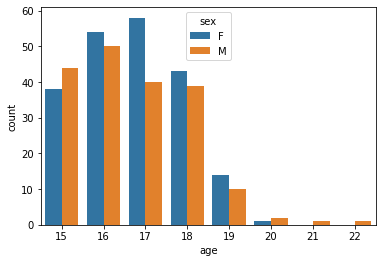

In [4]:
# 시각화 1 : 성별별로 나이 분포를 확인하려고 한다.
sns.countplot(x='age', data=df, hue='sex')

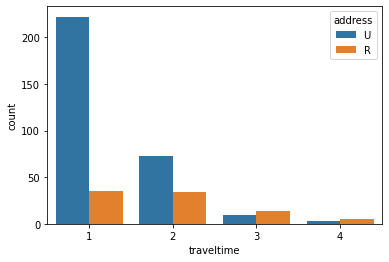

In [5]:
# 시각화 2 : 사는 지역별로 등교시간을 보자
sns.countplot(x='traveltime', data=df, hue='address')

위의 내용에서 알 수 있는 점은, 도시 지역의 거주 인구가 더 많고, 상대적으로 지방 지역의 학생이 등교시간이 더 길 비율이 높다는 것을 알 수 있다. 
즉, 지방 학생의 통행시간이 길 수 있음을 알 수 있다.
그런데 이것을 평균을 통해 비교를 할 수 있을까?
코드를 이렇게 작성할 수는 있을 것이다만.

In [6]:
print(df.groupby(['address'])['traveltime'].mean())

address
R    1.875000
U    1.325733
Name: traveltime, dtype: float64


정규분포도 아니기도 하고 심지어 범주형인데 이런식으로는 분석할수는 없을 것이다. 실제로 데이터를 다음과 같이 분리해서 분석을 한다고는 할 수 있지만
범주형 변수에 사용해야 하는 분석을 사용해야 한다.

In [7]:
# 우선적으로 등분산성 확인을 위한 데이터 분리?
data_r = np.array(df.loc[df['address'] == 'R', 'traveltime'])
data_u = np.array(df.loc[df['address'] == 'U', 'traveltime'])

위의 방식을 사용하여 가설을 확인할 수 있는 문제는 다음과 같다,
- 사교육(paid) 여부가 성적의 평균에 영향을 미칠까?


In [5]:
print(df.groupby(['paid'])['G3'].mean())

paid
no      9.985981
yes    10.922652
Name: G3, dtype: float64


In [6]:
paid_Y= np.array(df.loc[df['paid'] == 'yes', 'G3'])
paid_N = np.array(df.loc[df['paid'] == 'no', 'G3'])

t검정을 위하여 사전적으로 다음 것들을 확인하려고 한다.
- 성적이 정규분포를 띈다고 볼 수 있을까?


In [7]:
# 정규분포 검증
from scipy.stats import shapiro

print(shapiro(paid_Y))
print(shapiro(paid_N))

(0.9406052827835083, 8.101894195533532e-07)
(0.9243743419647217, 4.999557212670425e-09)


어라? 정규성이 낮다. 왜 이런 문제가 발생했는지 확인해보자. 

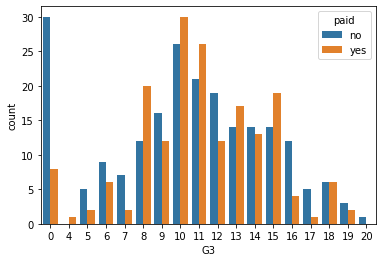

In [8]:
# 시각화 3 : 성별별로 나이 분포를 확인하려고 한다.
sns.countplot(x='G3', data=df, hue='paid')

In [ ]:
# 시각화 3-1 : 변형, 히스토그램을

여러 집단간에 평균 차이가 존재하는지, 확인 가능할 것이다.
이는 다음을 통해 알 수 있을 것이다.
- 공부 시간이 서로 다른 집단끼리, 성적 차이가 유의미하게 날 것인가?
(한마디로 무조건 공부시간만 많으면 성적이 더 높을까?)

만일 공부시간과 성적간의 차이가 없다면, 몇시간을 공부하던 성적의 평균에는 큰 영향이 없을 것이다.
성적의 경우는 물론 20점 만점의 범주형으로 볼 수 있지만, 시간 변수처럼 특정 공부 시간을 하나로 표현한 것이 아닌 '점수' 그 자체이므로 평균을 계산하는 것은 의미가 있다.

In [ ]:
print(df.groupby(['studytime'])['G3'].mean())

studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64


어라..? 

다음은 상관관계를 확인하고 싶다.
- 가족의 관계랑, 개인의 건강은 연관이 있을까?

(학대, 방치당한다면 개인의 건강이 망가진다는 이야기를 들은 적이 있는데 실제로 유의미한지 보고 싶다).



In [ ]:
df[['famrel','health']].corr()

,famrel,health
famrel,1.000000,0.094056
health,0.094056,1.000000


예상외로, 상관계수가 0.09정도로 매우 낮은 상관관계를 보이고 있다.?



**이것으로하면 안된다! 얘네들은 범주형 변수이다! 실패!**

**카이제곱 독립성 검정을 사용**해야 한다!

In [8]:
# table만들기
table = pd.crosstab(df.famrel, df.health)
table

health,1,2,3,4,5
famrel,,,,,
1,4,0,1,0,3
2,2,3,5,4,4
3,7,9,22,11,19
4,19,22,45,32,77
5,15,11,18,19,43


귀무가설 : 두 변수는 독립이다.
대립가설 : 두 변수는 상관관계가 존재한다.
유의수준 0.05에서 확인 결과

In [9]:
import scipy.stats as stats
stats.chi2_contingency(observed = table)

(22.636402802674013,
 0.12380538843085523,
 16,
 array([[ 0.95189873,  0.91139241,  1.84303797,  1.33670886,  2.95696203],
        [ 2.14177215,  2.05063291,  4.14683544,  3.00759494,  6.65316456],
        [ 8.09113924,  7.74683544, 15.66582278, 11.36202532, 25.13417722],
        [23.20253165, 22.21518987, 44.92405063, 32.58227848, 72.07594937],
        [12.61265823, 12.07594937, 24.42025316, 17.71139241, 39.17974684]]))

p-value 값이 0.1238정도로, p-value가 유의 수준보다 크므로 귀무가설을 기각할 수 없다. 

따라서 두 변수가 상관관계가 있다고 보기는 어려울 것이다. 놀랍다.
